## Observations and Insights

1. there is a positive correlation between average tumor volume and weight of mice. 2. Capomulin has the most data points out of all the drugs. 3. Capomulin and Ramicane were also the most successful drugs


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_study_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#mouse_metadata.head()

In [3]:
#study_results.head()

## Summary statistics

In [4]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

drug_regimen_stats = combined_study_data_df.groupby('Drug Regimen')
drug_regimen_volume = drug_regimen_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
round_regime_volume = round(drug_regimen_volume, 2)
round_regime_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0.5, 1.0, 'Treatment Regimen')

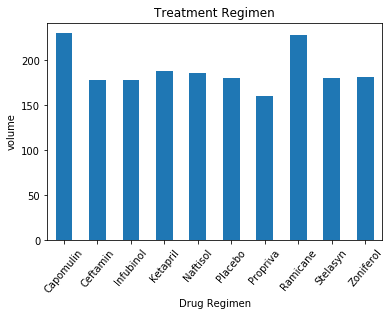

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_data_df = combined_study_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot = pd.DataFrame(bar_data_df)

also = bar_plot.plot.bar(legend=False,rot=50)
also
plt.ylabel("volume")
plt.title("Treatment Regimen")

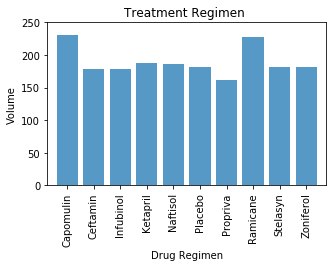

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
bar_data_df = combined_study_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot = pd.DataFrame(bar_data_df)

x_axis = np.arange(len(bar_data_df))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

reset_entry = bar_plot.reset_index()
reset_entry

plt.bar(x_axis, bar_plot['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, reset_entry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(bar_data_df)-.25)
plt.ylim(0, 250)

plt.title("Treatment Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Volume")

plt.show()

## Pie plots

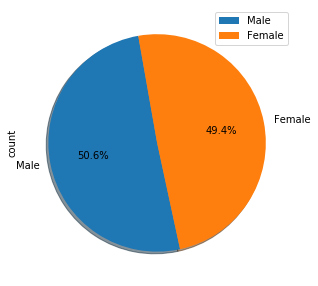

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x2517f879c08>,
 [Text(-0.5317197938550638, -0.9629507052921912, 'Male'),
  Text(0.531719793855064, 0.9629507052921912, 'Female')],
 [Text(-0.29002897846639847, -0.525245839250286, '50.6%'),
  Text(0.2900289784663985, 0.525245839250286, '49.4%')])

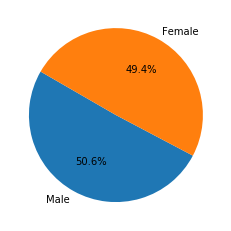

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_study_data_df["Sex"].value_counts())
gender_df = pd.DataFrame(gender_count)
labels = ["Male", "Female"]
plt.pie(gender_df, labels=labels, autopct="%1.1f%%", startangle=150)

## Quartiles, outliers and boxplots

In [9]:
combined_study_data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
# Calculate the final tumor volume of each mouse across four of 
# the most promising treatment regimens. Calculate the 
# IQR and quantitatively determine if there are any potential outliers. 

capomulin_regimen_df = combined_study_data_df.loc[combined_study_data_df["Drug Regimen"] == "Capomulin",:]

capomulin_time_point = capomulin_regimen_df.groupby('Mouse ID').max()['Timepoint']
capomulin_new_volume = pd.merge(capomulin_time_point, combined_study_data_df, on=("Mouse ID","Timepoint"),how="left")
tumors = capomulin_new_volume["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
capomulin_interquartile_range = upper_quartile-lower_quartile


lower_outlier_capomulin = round(lower_quartile - (1.5*capomulin_interquartile_range),2)
upper_outlier_capomulin = round(upper_quartile + (1.5*capomulin_interquartile_range),2)


#2nd tumor

ramicane_regimen_df = combined_study_data_df.loc[combined_study_data_df["Drug Regimen"] == "Ramicane", :]

ramicane_time_point = ramicane_regimen_df.groupby('Mouse ID').max()['Timepoint']
ramicane_new_volume = pd.merge(ramicane_time_point, combined_study_data_df, on=("Mouse ID","Timepoint"),how="left")
tumors2 = ramicane_new_volume["Tumor Volume (mm3)"]

quartiles = tumors2.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
ramicane_interquartile_range = upper_quartile-lower_quartile


lower_outlier_ramicane = round(lower_quartile - (1.5*ramicane_interquartile_range),2)
upper_outlier_ramicane = round(upper_quartile + (1.5*ramicane_interquartile_range),2)



# 3rd
infubinol_regimen_df = combined_study_data_df.loc[combined_study_data_df["Drug Regimen"] == "Infubinol", :]

infubinol_time_point = infubinol_regimen_df.groupby('Mouse ID').max()['Timepoint']
infubinol_new_volume = pd.merge(infubinol_time_point, combined_study_data_df, on=("Mouse ID","Timepoint"),how="left")
tumors3 = infubinol_new_volume["Tumor Volume (mm3)"]

quartiles = tumors3.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
infubinol_interquartile_range = upper_quartile-lower_quartile


lower_outlier_infubinol = round(lower_quartile - (1.5*infubinol_interquartile_range),2)
upper_outlier_infubinol = round(upper_quartile + (1.5*infubinol_interquartile_range),2)



#4th
ceftamin_regimen_df = combined_study_data_df.loc[combined_study_data_df["Drug Regimen"] == "Ceftamin", :]

ceftamin_time_point = ceftamin_regimen_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_new_volume = pd.merge(ceftamin_time_point, combined_study_data_df, on=("Mouse ID","Timepoint"),how="left")
tumors4 = ceftamin_new_volume["Tumor Volume (mm3)"]

quartiles = tumors4.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
ceftamin_interquartile_range = upper_quartile-lower_quartile


lower_outlier_ceftamin = round(lower_quartile - (1.5*ceftamin_interquartile_range),2)
upper_outlier_ceftamin = round(upper_quartile + (1.5*ceftamin_interquartile_range),2)

print(f"Capomulin potential outliers is probaly below {lower_outlier_capomulin} and above {upper_outlier_capomulin}")
print(f"Ramicane potential outliers is probaly below {lower_outlier_ramicane} and above {upper_outlier_ramicane}")
print(f"Infubinol potential outliers is probaly below {lower_outlier_infubinol} and above {upper_outlier_infubinol}")
print(f"Ceftamin potential outliers is probaly below {lower_outlier_ceftamin} and above {upper_outlier_ceftamin}")


Capomulin potential outliers is probaly below 20.7 and above 51.83
Ramicane potential outliers is probaly below 17.91 and above 54.31
Infubinol potential outliers is probaly below 36.83 and above 82.74
Ceftamin potential outliers is probaly below 25.36 and above 87.67


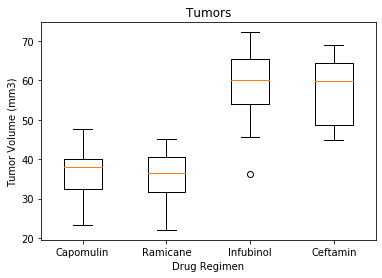

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and scatter plots

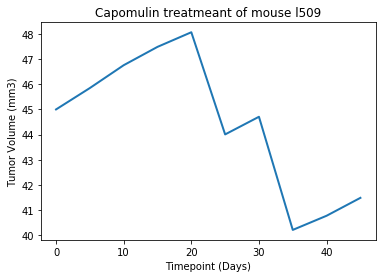

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
forline_df = capomulin_regimen_df.loc[capomulin_regimen_df["Mouse ID"] == "l509",:]
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

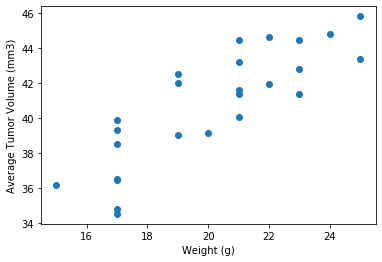

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = capomulin_regimen_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model


The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

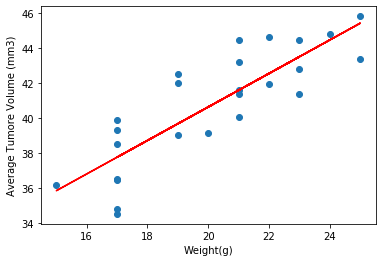

In [15]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()